<a href="https://colab.research.google.com/github/elisabethelen/deeplearning/blob/main/Multilabel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://youtu.be/hraKTseOuJA

"""
Dataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html
"""

'\nDataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html\n'

In [2]:
!pip install -q kaggle

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [4]:
#image_directory = 'DatasetMultilabel_ElisabethBupu_202255202026/images/'

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("raman77768/movie-classifier")

#print("Path to dataset files:", path)

In [7]:
import os
os.environ["KAGGLE_DatasetMultilabel_ElisabethBupu_202255202026"] = "pacesatu" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "cb02696c8d3cdf51cb984c6c254a3ce8" # Ganti dengan key yang ada di kaggle.json

In [8]:
!kaggle datasets download -d raman77768/movie-classifier

Dataset URL: https://www.kaggle.com/datasets/raman77768/movie-classifier
License(s): CC0-1.0
movie-classifier.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# prompt: unzip file movie-classifier.zip

!unzip movie-classifier.zip


Streaming output truncated to the last 5000 lines.
  inflating: Multi_Label_dataset/Images/tt0126886.jpg  
  inflating: Multi_Label_dataset/Images/tt0126916.jpg  
  inflating: Multi_Label_dataset/Images/tt0127247.jpg  
  inflating: Multi_Label_dataset/Images/tt0127349.jpg  
  inflating: Multi_Label_dataset/Images/tt0127536.jpg  
  inflating: Multi_Label_dataset/Images/tt0127722.jpg  
  inflating: Multi_Label_dataset/Images/tt0127723.jpg  
  inflating: Multi_Label_dataset/Images/tt0128239.jpg  
  inflating: Multi_Label_dataset/Images/tt0128278.jpg  
  inflating: Multi_Label_dataset/Images/tt0128442.jpg  
  inflating: Multi_Label_dataset/Images/tt0128445.jpg  
  inflating: Multi_Label_dataset/Images/tt0128853.jpg  
  inflating: Multi_Label_dataset/Images/tt0129167.jpg  
  inflating: Multi_Label_dataset/Images/tt0129280.jpg  
  inflating: Multi_Label_dataset/Images/tt0129290.jpg  
  inflating: Multi_Label_dataset/Images/tt0129332.jpg  
  inflating: Multi_Label_dataset/Images/tt0129387.jpg

In [ ]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/Multi_Label_dataset/train.csv')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 1000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

          Id                                Genre  Action  Adventure  \
0  tt0086425                  ['Comedy', 'Drama']       0          0   
1  tt0085549        ['Drama', 'Romance', 'Music']       0          0   
2  tt0086465                           ['Comedy']       0          0   
3  tt0086567               ['Sci-Fi', 'Thriller']       0          0   
4  tt0086034  ['Action', 'Adventure', 'Thriller']       1          1   

   Animation  Biography  Comedy  Crime  Documentary  Drama  ...  N/A  News  \
0          0          0       1      0            0      1  ...    0     0   
1          0          0       0      0            0      1  ...    0     0   
2          0          0       1      0            0      0  ...    0     0   
3          0          0       0      0            0      0  ...    0     0   
4          0          0       0      0            0      0  ...    0     0   

   Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0           0        0     

In [ ]:
SIZE = 200
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/Multi_Label_dataset/Images/' # Change to extracted image directory
for i in tqdm(range(df.shape[0])):
    # Added '/' as a separator between image_directory and filename
    img = image.load_img(image_directory + '/' + df['Id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 2000/2000 [00:02<00:00, 744.42it/s]


In [ ]:
#
print(df['Id'][500])  #King Kong


tt0091344


In [ ]:
print(df['Genre'][500])  #Tagged as multiple Genres.

['Action', 'Adventure', 'Horror']


In [ ]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['Id', 'Genre'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,777 (2.68 MB)

 Trainable params: 702,425 (2.68 MB)

 Non-trainable params: 352 (1.38 KB)

In [ ]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 270ms/step - accuracy: 0.0623 - loss: 0.8282 - val_accuracy: 0.1900 - val_loss: 0.3394
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1708 - loss: 0.4243 - val_accuracy: 0.1900 - val_loss: 0.2701
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2196 - loss: 0.3530 - val_accuracy: 0.3233 - val_loss: 0.2558
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2017 - loss: 0.3281 - val_accuracy: 0.1900 - val_loss: 0.2605
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.2671 - loss: 0.2973 - val_accuracy: 0.2267 - val_loss: 0.2504
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2731 - loss: 0.2883 - val_accuracy: 0.1900 - val_loss: 0.2642
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2890 - loss: 0.2734 - val_accuracy: 0.1900 - val_loss: 0.2591
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2639 - loss: 0.2680 - val_accuracy: 0.1900 -

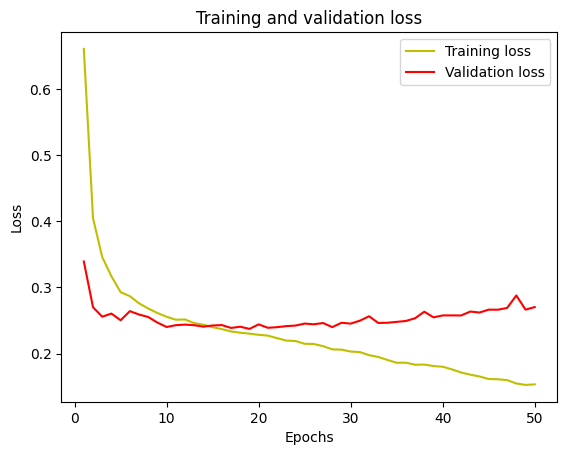

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

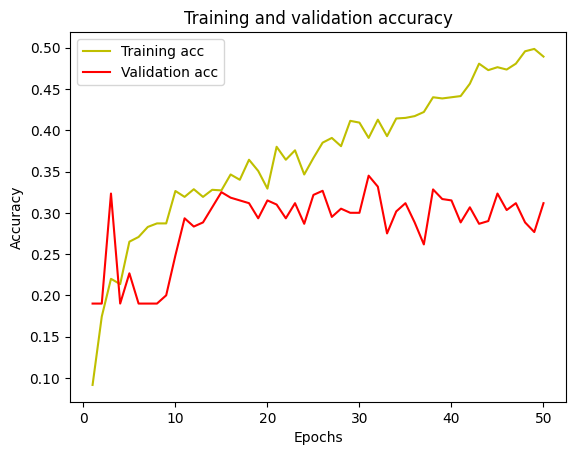

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


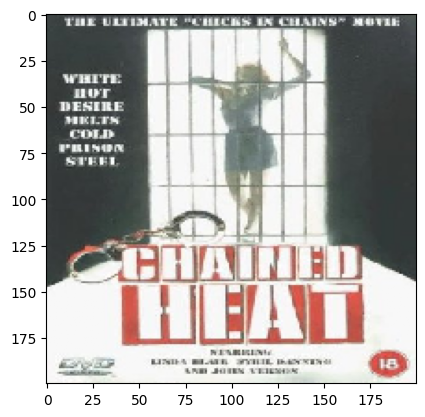

In [ ]:
#Validate on an image
#img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/Multi_Label_dataset/Images/'
img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [ ]:
#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Drama (0.869)
Crime (0.863)
Action (0.511)
Thriller (0.272)
Mystery (0.055)
Comedy (0.0174)
Romance (0.0096)
Horror (0.00323)
Adventure (0.0032)
Sci-Fi (0.00141)


In [ ]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2802 - loss: 0.2711
Accuracy =  31.166666746139526 %


In [ ]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
              precision    recall  f1-score   support

      Action       0.36      0.03      0.06       127
   Adventure       0.00      0.00      0.00        80
   Animation       0.00      0.00      0.00         9
   Biography       0.00      0.00      0.00        31
      Comedy       0.55      0.65      0.60       260
       Crime       0.27      0.08      0.13       118
 Documentary       0.00      0.00      0.00        14
       Drama       0.57      0.63      0.60       299
      Family       0.00      0.00      0.00        28
     Fantasy       0.00      0.00      0.00        39
     History       0.00      0.00      0.00         8
      Horror       0.50      0.01      0.03        69
       Music       0.00      0.00      0.00        32
     Musical       0.00      0.00      0.00         8
     Mystery       0.00      0.00      0.00        42
         N/A       0.00      0.00      0.00         0
        News       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me